# (Prosper Loan Dataset Visual Analysis)
## by (Ujwala K)

## Investigation Overview

>Mainly my focus will be to answer below questions:-¶

>1)Factors responsible for loan status outcome such as completed or cancelled or past-due etc

>2)Factors affecting borrower's APR(which usually includes broker fees, closing costs, rebates, and discount points) and borrower's interest rate

>3)Large loan amount differentiation factors(Are there differences between loans depending on how large the original loan amount was?)


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRatingCombined', 'EmploymentStatus']


# Convert EmploymentStatus and IncomeRange to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

    
    

df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)    
    

# replace NC with HR
df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
df['ProsperRatingCombined'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

# drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')

# check values
df['ProsperRatingCombined'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

## Borrower APR vs. Loan Amount

> This plot again shows the same observation as of above correlation map that range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

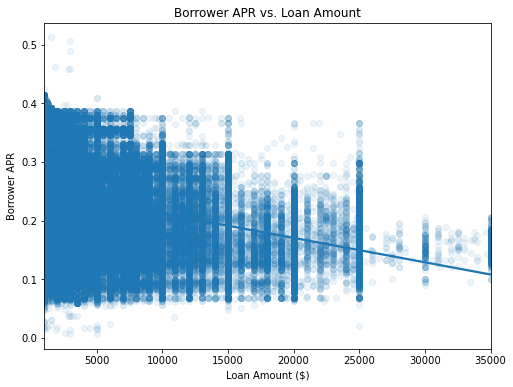

In [6]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.08});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

##  BorrowerAPR and LoanOriginalAmount relation with categorical Term and Credit-ProsperScores

>1)Employmentstatus with Employment definitely has LoanAmount sactioned more as per box plot quartiles , however BorrowerRate seems almost same for all employtment statuses.

>2)Borrowers with better rating also have higher loan amount.

>3)For higher Loan Amounts , term is also high.

<Figure size 720x720 with 0 Axes>

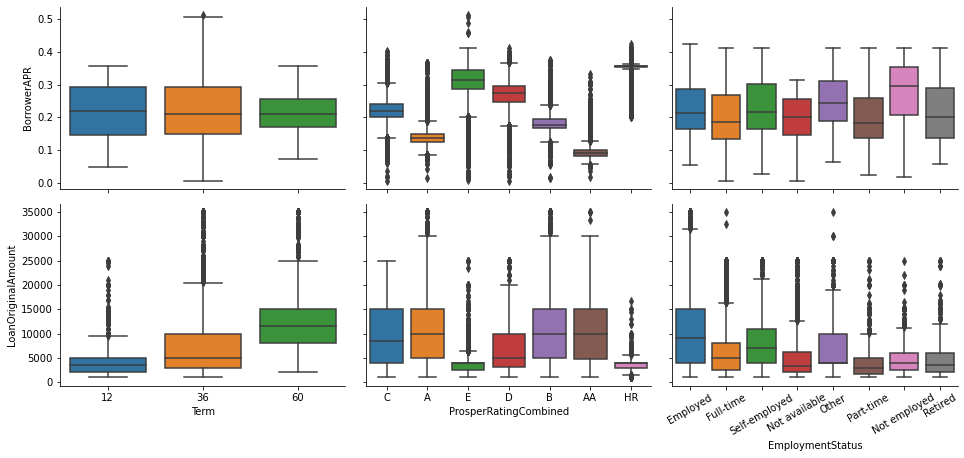

In [7]:
# plot matrix of numeric features against categorical features.


plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = cat_vars, height = 3, aspect = 1.5)
g.map(sb.boxplot);
plt.xticks(rotation=30);

## Heatmap of Median Estimated Returns by Credit Rating and Income Range

From the heat map we can see that for lower credit ratings, and lower incomes we have higher estimated returns. However income range is not influencing the estimated returns by credit rating category.


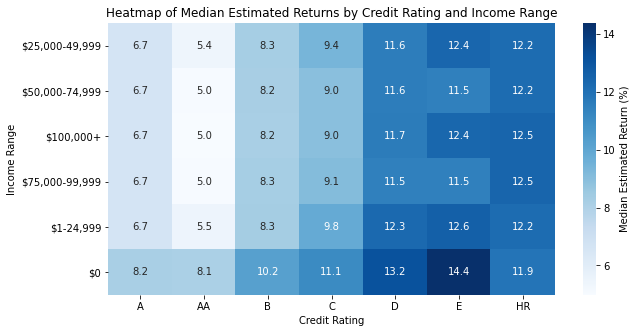

In [8]:
plt.figure(figsize = [10,5])

cat_med = df.groupby(['ProsperRatingCombined', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRatingCombined', values = 'EstimatedReturnMedian')

sb.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Credit Rating and Income Range');

## Pairplot for BorrowerAPR and Estimated loss , Return relationship

Its clear from the plots above that BorrowerAPR has positive relationship with EstimatedLoss and EstimatedReturn , BorrowerAPR increases with both of them.

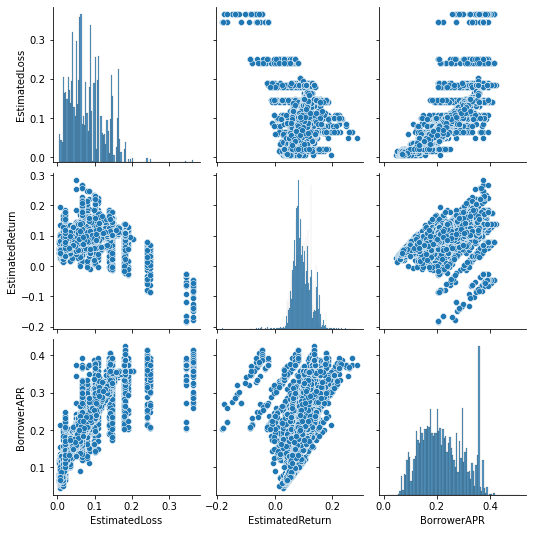

In [9]:
sb.pairplot(df[['EstimatedLoss', 'EstimatedReturn', 'BorrowerAPR']]);


## LoanStatus and Estimated loss , Return relationship

From above Box plots ,we can observe that ChargedOff and Defaulted Loan Statuses Borrowers have higher EstimatedLoss and EstimatedReturn percentage



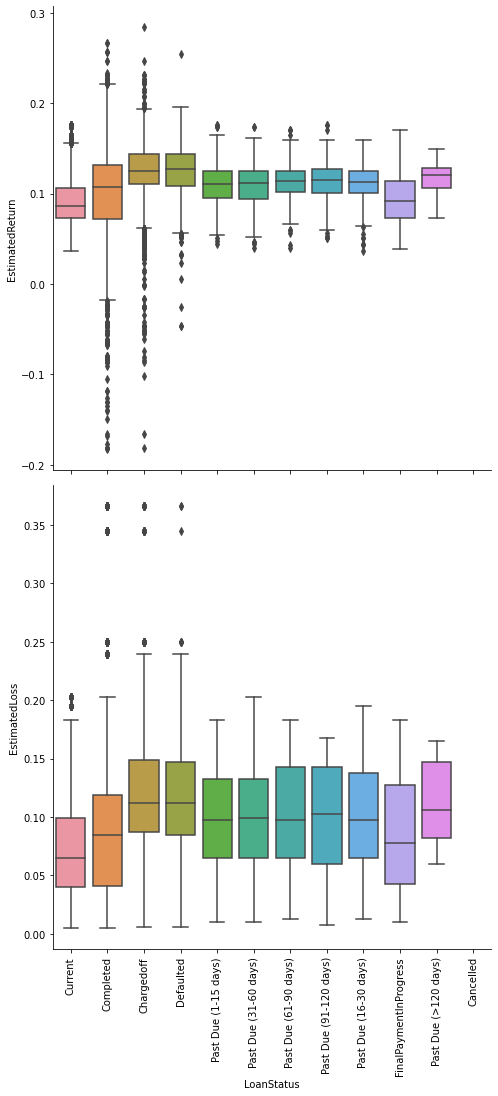

In [10]:
g = sb.PairGrid(data = df, y_vars = ['EstimatedReturn', 'EstimatedLoss'],
                x_vars = ['LoanStatus'] , height=7)
g.map(sb.boxplot);
plt.xticks(rotation=90);